cancer data shape: (569, 32)
diagnosis
0    357
1    212
Name: count, dtype: int64
perimeter_worst            0.474685
area_worst                 0.464847
radius_worst               0.456148
concave points_mean        0.439333
concave points_worst       0.437013
perimeter_mean             0.403438
concavity_mean             0.372475
radius_mean                0.365916
area_mean                  0.359403
area_se                    0.339096
concavity_worst            0.315987
perimeter_se               0.274254
radius_se                  0.250439
compactness_worst          0.226697
compactness_mean           0.210531
concave points_se          0.127336
texture_worst              0.123684
concavity_se               0.116437
texture_mean               0.095467
symmetry_worst             0.094841
smoothness_worst           0.091762
smoothness_mean            0.077677
compactness_se             0.073531
fractal_dimension_worst    0.066406
symmetry_mean              0.063022
fractal_dimension

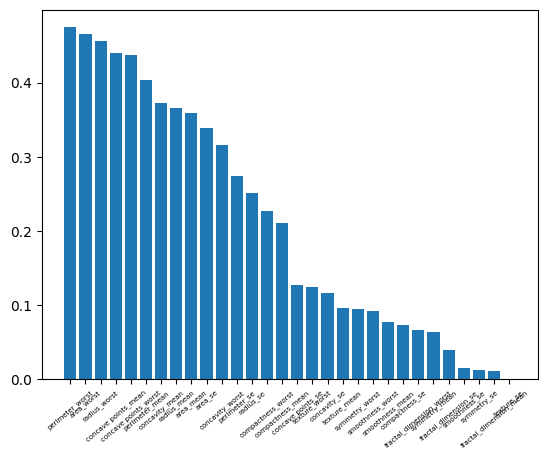

In [1]:
#selectKbest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, roc_auc_score, auc

cancer_data=pd.read_excel('Cancer_Data.xlsx')
print('cancer data shape:',cancer_data.shape)
cancer_data['diagnosis']=cancer_data['diagnosis'].map({'M': 1, 'B': 0})
balance_T=cancer_data['diagnosis'].value_counts()
print(balance_T)

x=np.array(cancer_data.iloc[:,2:])
y=np.array(cancer_data['diagnosis'])

##x-axis調整##

mi_scores=pd.Series(mutual_info_classif(x, y), name="MI Scores", index=cancer_data.columns[2:])
mi_scores=mi_scores.sort_values(ascending=False)
print(mi_scores) 

plt.bar(mi_scores.index, mi_scores)
plt.xticks(color='black',fontsize=5,rotation=40)
plt.show()

In [2]:
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


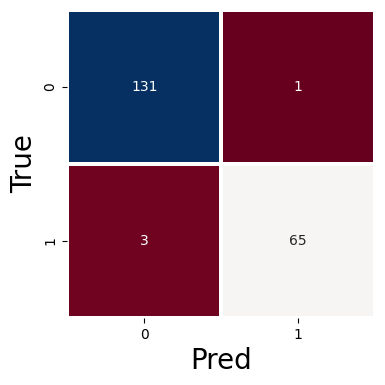

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       132
           1       0.98      0.96      0.97        68

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



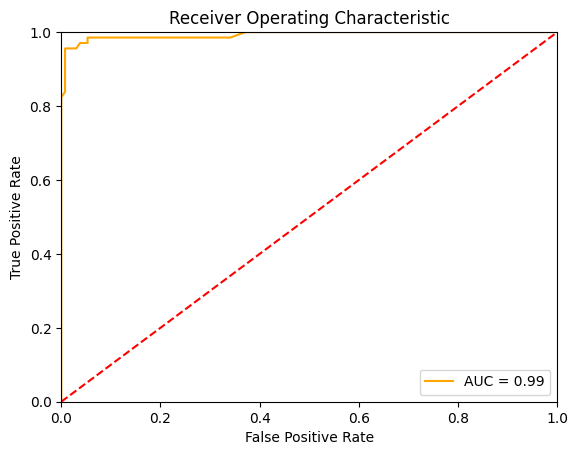

Cross Validation Scores (Mean): 0.9457957957957959
(200, 30)


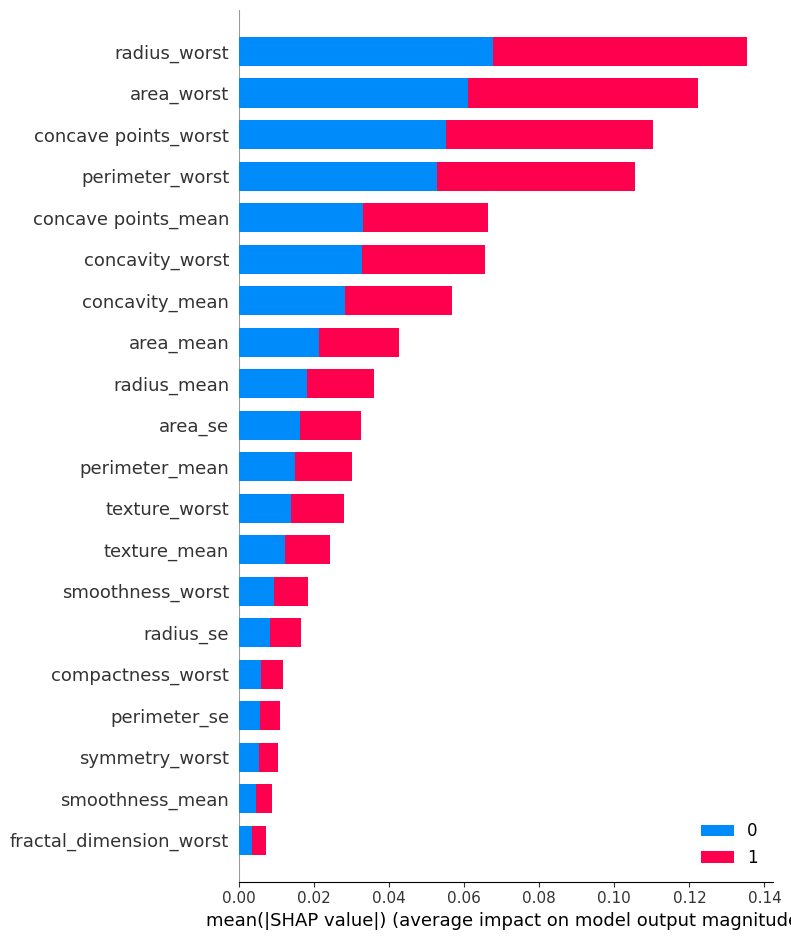

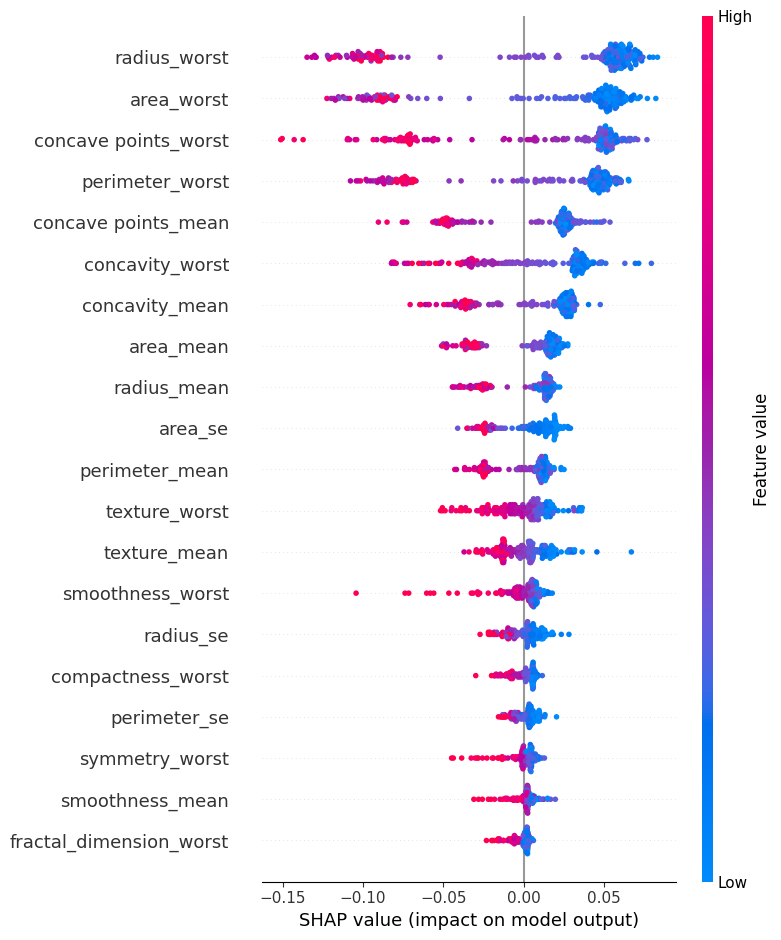

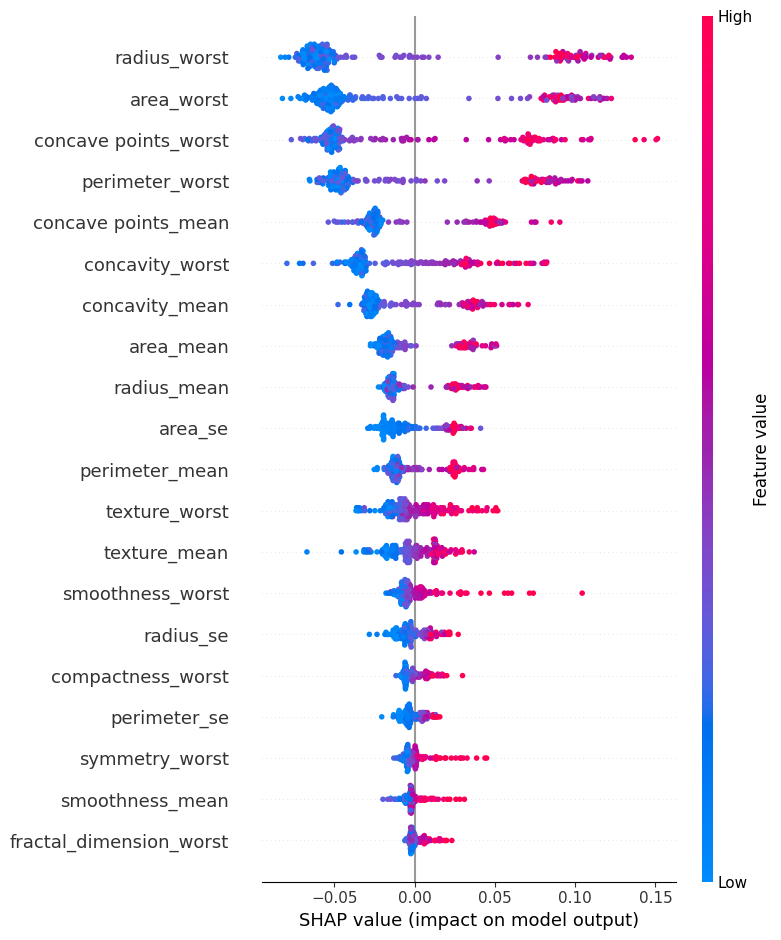

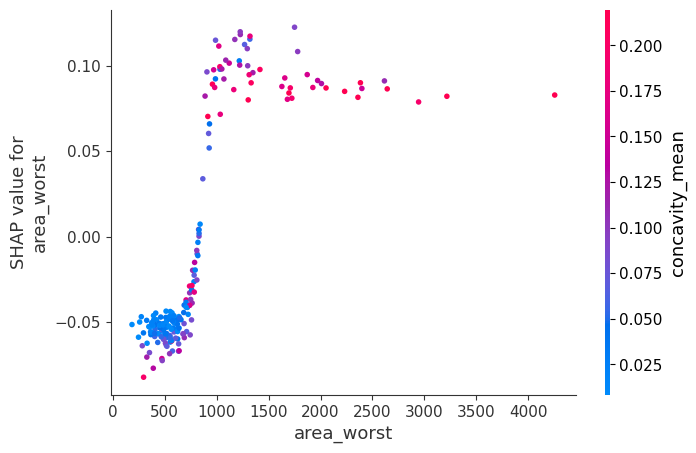

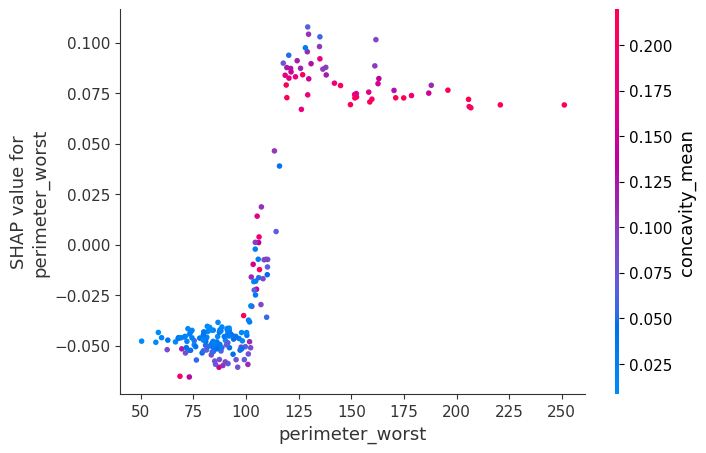

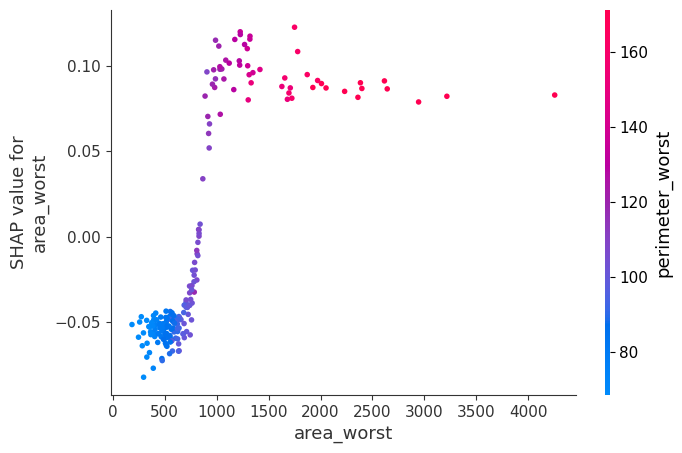

測試集第 50 筆模型預測結果: [[0.605 0.395]]


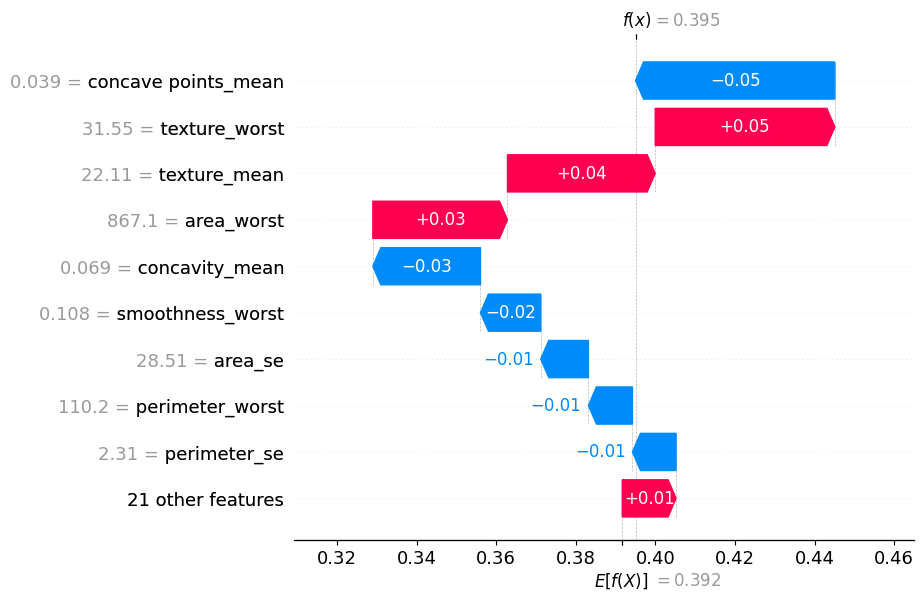

In [29]:
#Random Forest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,accuracy_score
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2000)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_test)

cm=confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(10,4))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
print(classification_report(y_test,rfc_pred))

y_pre_prob=rfc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,y_pre_prob[:,1])
auc1 = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

scores=cross_val_score(rfc, X_train, y_train, cv=10)
print('Cross Validation Scores (Mean):',scores.mean())
print( X_test.shape)

#嘗試使用shap
import shap
shap.initjs()
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, class_names= [0,1], feature_names=cancer_data.columns[2:])
shap.summary_plot(shap_values[0], X_test, feature_names=cancer_data.columns[2:])
shap.summary_plot(shap_values[1], X_test, feature_names=cancer_data.columns[2:])

shap.dependence_plot('area_worst', shap_values[1], X_test, feature_names=cancer_data.columns[2:])
shap.dependence_plot('perimeter_worst', shap_values[1], X_test, feature_names=cancer_data.columns[2:])

#觀察area_worst和perimeter_worst之間交互作用對於SHAP之影響
shap.dependence_plot('area_worst', shap_values[1], X_test, feature_names=cancer_data.columns[2:], interaction_index='perimeter_worst')

#觀察測試集中第50筆資料預測確定為癌症的重要程度
index=49
print(f'測試集第 {index+1} 筆模型預測結果: {rfc.predict_proba(X_test[[index], :])}')
shap.force_plot(explainer.expected_value[1], shap_values[1][index], X_test[index], feature_names=cancer_data.columns[2:], link='logit')

#SHAP waterfall plot觀察測試集中第50筆資料
index=49
shap.waterfall_plot(shap.Explanation(values=shap_values[1][index], base_values=explainer.expected_value[1], data=X_test[index], feature_names=cancer_data.columns[2:]))
shap.plots.force(explainer.expected_value[1], shap_values[1], X_test)

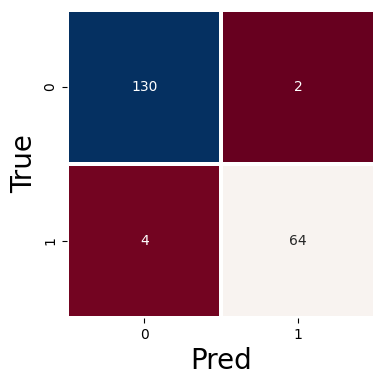

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       132
           1       0.92      0.85      0.89        68

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200

Cross Validation Scores (Mean): 0.9321321321321321


In [4]:
#K-nearest neighbor (KNN)

from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(n_neighbors=5) 
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)

cm2=confusion_matrix(y_test,KNN_pred)
plt.figure(figsize=(10,4))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
print(classification_report(y_test,KNN_pred))

scores1=cross_val_score(KNN, X_train, y_train, cv=10)
print('Cross Validation Scores (Mean):',scores1.mean())

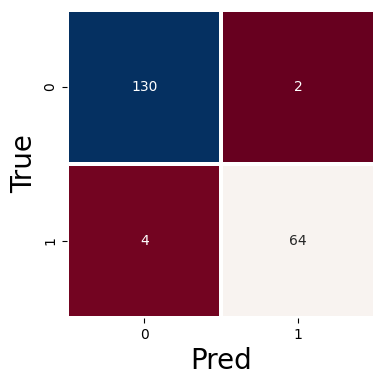

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       132
           1       0.92      0.85      0.89        68

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



In [5]:
#Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

MLP= MLPClassifier()
MLP.fit(X_train, y_train)
MLP_pre = MLP.predict(X_test)

cm3=confusion_matrix(y_test,MLP_pre)
plt.figure(figsize=(10,4))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
print(classification_report(y_test,MLP_pre))

主成分變異數:[1.26337856e+04 1.79843644e+03 5.09936242e+02 1.41958165e+02
 1.23206617e+02 3.48885304e+01 2.63811171e+01 1.12859001e+01
 7.32631813e+00 5.97786591e+00 3.51676219e+00 1.67326150e+00
 1.11296091e+00 9.31346742e-01 7.03437000e-01 4.84434656e-01
 3.87524922e-01 2.92353784e-01 2.61673997e-01 2.45616365e-01
 1.64116462e-01 1.48211745e-01 1.15231775e-01 1.00869980e-01
 7.73625482e-02 6.80292618e-02 3.49313475e-02 3.14109513e-02
 2.40340025e-02 1.54464354e-02]
主成分變異貢獻百分比:[9.78351151e+01 1.98252167e+00 1.59389429e-01 1.23523194e-02
 9.30455965e-03 7.46093244e-04 4.26593388e-04 7.80728725e-05
 3.29002579e-05 2.19038317e-05 7.58077764e-06 1.71615059e-06
 7.59254849e-07 5.31680283e-07 3.03304024e-07 1.43846124e-07
 9.20506863e-08 5.23896137e-08 4.19709589e-08 3.69779094e-08
 1.65094288e-08 1.34645858e-08 8.13902267e-09 6.23665359e-09
 3.66850646e-09 2.83673831e-09 7.47925661e-10 6.04769575e-10
 3.54062523e-10 1.46246102e-10]


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined an

PCA+QDA:     Precision    Recall        F1  Accuracy
1    0.904924  0.925134  0.913194     0.920
2    0.170000  0.500000  0.253731     0.340
3    0.170000  0.500000  0.253731     0.340
4    0.170000  0.500000  0.253731     0.340
5    0.170000  0.500000  0.253731     0.340
6    0.170000  0.500000  0.253731     0.340
7    0.170000  0.500000  0.253731     0.340
8    0.170000  0.500000  0.253731     0.340
9    0.170000  0.500000  0.253731     0.340
10   0.170000  0.500000  0.253731     0.340
11   0.170000  0.500000  0.253731     0.340
12   0.170000  0.500000  0.253731     0.340
13   0.170000  0.500000  0.253731     0.340
14   0.170000  0.500000  0.253731     0.340
15   0.170000  0.500000  0.253731     0.340
16   0.170000  0.500000  0.253731     0.340
17   0.170000  0.500000  0.253731     0.340
18   0.170000  0.500000  0.253731     0.340
19   0.170000  0.500000  0.253731     0.340
20   0.170000  0.500000  0.253731     0.340
21   0.170000  0.500000  0.253731     0.340
22   0.170000  0.500000

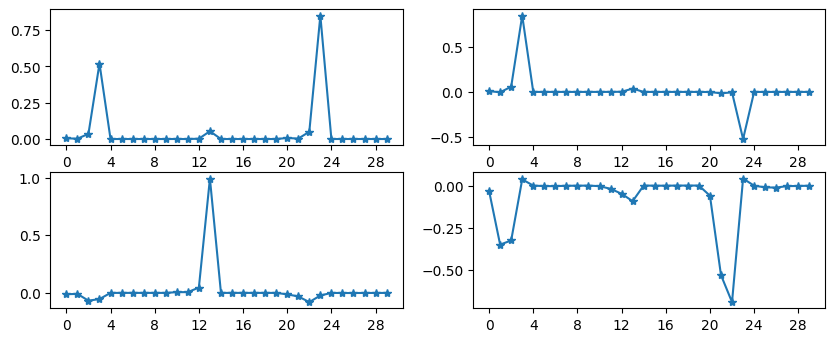

In [6]:
from matplotlib.ticker import MaxNLocator

#n_components的實際意思

pca=PCA(n_components=30)
pca.fit(X_train)
print('主成分變異數:{}'.format(pca.singular_values_))
print('主成分變異貢獻百分比:{}'.format(pca.explained_variance_ratio_*100))
XP_train=pca.fit_transform(X_train)
XP_test=pca.inverse_transform(X_test)

QDA=QuadraticDiscriminantAnalysis()
performance_PCA_QDA=[]
for n in range(30):
    dim=n+1
    QDA.fit(XP_train[:,:dim], y_train)
    y_pred=QDA.predict(XP_test[:,:dim])
    performance_PCA_QDA.append(pd.Series({"Precision" : precision_score(y_test, y_pred,average='macro'),
                                        "Recall" : recall_score(y_test, y_pred,average='macro'),
                                        "F1" : f1_score(y_test, y_pred,average='macro'),
                                        "Accuracy" : accuracy_score(y_test, y_pred),},name = '{}'.format(dim)))
performance_PCA_QDA=pd.DataFrame(performance_PCA_QDA)
print('PCA+QDA:',performance_PCA_QDA)

plt.figure(figsize=(10,6))
for i in range(4):
    print('第{}個PC的解釋量百分比:{}'.format(i+1, pca.explained_variance_ratio_[i]))
    plt.subplot(3,2,i+1)
    plt.plot(pca.components_[i],'-*')
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

print(cancer_data.columns[3])
print(cancer_data.columns[23])
print(cancer_data.columns[22:24])
print(pca.components_[0])